In [ ]:
### create a simple neural network (ANN)

In [ ]:
# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Reading the churn modeling.csv file into dataset
dataset=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
# number of rows and columns
dataset.shape

(10000, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# how many null values w.r.t columns wise
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# how many null values over all columns
dataset.isnull().sum().sum()

0

In [ ]:
# to see top5 rows
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# data set into two parts one indepdent and dependet features
X=dataset.iloc[:,3:13]
y=dataset.iloc [:,13]

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [8]:
# converting a catgorical variable into an numerical variable by using pd.getdummies()
geography=pd.get_dummies(X['Geography'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
X.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
gender=pd.get_dummies(X['Gender'],drop_first=True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
#merging dummy coded geography and gender into x dataset
X=pd.concat([X,geography,gender],axis=1)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
# DROP THE GEOGraphy and gender
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
# splitting data into tain and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [13]:
#apply standard scaler
from sklearn.preprocessing import StandardScaler # the values of each columns are different (high and lows are avaialble)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Create  or make the ANN

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Dense #sparse or dense
from keras.layers import LeakyReLU,PReLU,ELU # activation functions

In [15]:
# intialize the empty artifical neural network without inputs and outputs
classifier=Sequential()

In [16]:
# adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11)) #units are output dimension(neurons),keral_intializers are weight intilalization Technqiues


In [17]:
# adding the second input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu')) # for relu u can use he_uniform, he_normal

In [18]:
# adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation="sigmoid")) # for sigmoid we have to use weight intialzers as a glorot


In [ ]:
# sigmoid actiavtion function will be used in output layers if your ouptut is binary classification

In [19]:
#compling the ANN
classifier.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=["accuracy"])

In [20]:
#fitting the ann to the training set
annhistory=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.9243 - accuracy: 0.4568 - val_loss: 0.6835 - val_accuracy: 0.6365
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6173 - accuracy: 0.7347 - val_loss: 0.5695 - val_accuracy: 0.7868
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5465 - accuracy: 0.7927 - val_loss: 0.5246 - val_accuracy: 0.7963
Epoch 4/100
536/536 [==============================] - 1s 3ms/step - loss: 0.5115 - accuracy: 0.7974 - val_loss: 0.4977 - val_accuracy: 0.7978
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.7994 - val_loss: 0.4785 - val_accuracy: 0.8001
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4691 - accuracy: 0.8026 - val_loss: 0.4645 - val_accuracy: 0.8058
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4554 - accuracy: 0.8084 - val_loss: 0.4544 - val_accuracy: 0.8114

In [21]:
print(annhistory.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


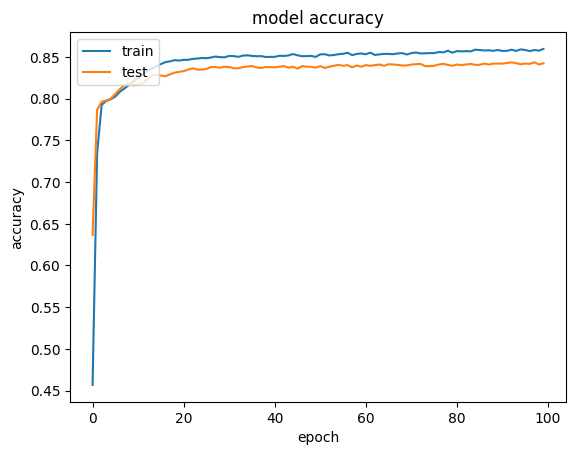

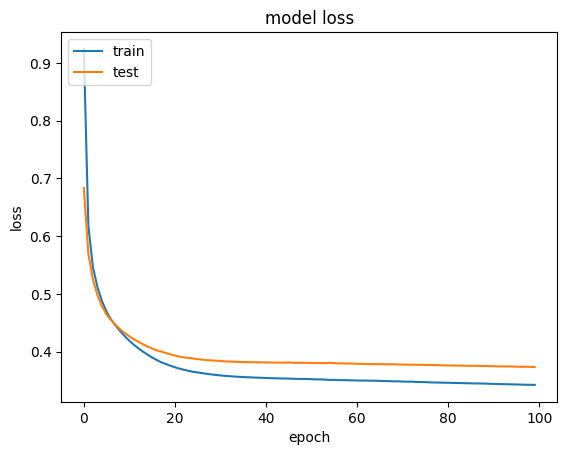

In [23]:
#summarize histiry for accuracy
plt.plot(annhistory.history['accuracy'])
plt.plot(annhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(annhistory.history['loss'])
plt.plot(annhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [24]:
# Predictions and Thresholding
y_pred=classifier.predict(X_test)
y_pred=(y_pred>.5)

63/63 [==============================] - 0s 1ms/step


In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [26]:
#Accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
#model Accuracy
score

0.862